In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coffee-sales-dataset/Coffe_sales.csv


# Coffee Sales Data Analysis   
  

## 1. Introduction  
**In this notebook, we will analyze the coffee sales dataset to understand sales patterns, customer preferences, and regional trends.** 

## 2. Importing Libraries

In [2]:
import os
import sys
import matplotlib
#matplotlib.use('Agg')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# List all folders in the input directory
print(os.listdir("/kaggle/input"))
print(os.listdir("/kaggle/input/coffee-sales-dataset"))



['coffee-sales-dataset']
['Coffe_sales.csv']


## 3. Loading the Dataset and data overview


In [3]:
#Load and explore the data
df = pd.read_csv("/kaggle/input/coffee-sales-dataset/Coffe_sales.csv")
print(df.head())
print()
print(df.info())
print()
print(df.describe())

   hour_of_day cash_type  money    coffee_name Time_of_Day Weekday Month_name  \
0           10      card   38.7          Latte     Morning     Fri        Mar   
1           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
2           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
3           13      card   28.9      Americano   Afternoon     Fri        Mar   
4           13      card   38.7          Latte   Afternoon     Fri        Mar   

   Weekdaysort  Monthsort        Date             Time  
0            5          3  2024-03-01  10:15:50.520000  
1            5          3  2024-03-01  12:19:22.539000  
2            5          3  2024-03-01  12:20:18.089000  
3            5          3  2024-03-01  13:46:33.006000  
4            5          3  2024-03-01  13:48:14.626000  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       ---

* used df = pd.read_csv() to import the csv file
* used df.head() to get the first five rows of the database
* uded df.info() to get some information in the database
* used df.describe to to give me some statistical information for some columns in the table

**My Analysis**
* Mean price for all coffee = 31.65
* Median price for all coffee = 32.82
* Minimum coffee price = 18.12
* Maximum coffee price = 38.70

## 4. Cleaning the data

In [4]:
#cleaning the data
print(df.isnull().sum())
print(df.duplicated().sum())
df.drop_duplicates(inplace = True)

hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64
0


* Used df.isnull().sum() to check for any null values in each column of the database
* Used df.duplicated().sum() to check the number of duplicated rows in the database
* used df.drop_duplicates(inplace = True) to remove duplicates rows in the database
  
**My Analysis**
* Zero null values in each columns
* Zero duplicates

## 5. Exploring the Data
### 5.1 Total Sales revenue and order

In [5]:
#What is the total revenue and number of orders overall?
print('Total revenue over the period: ',df['money'].sum())
print('Total number of orders: ', df['money'].count())

Total revenue over the period:  112245.58
Total number of orders:  3547



**My analysis**
1. Total revenue = 112245.58
2. Total number of orders = 3547

### 5.2 January Sales Revenue

In [6]:
#Total sales in the month of January
df1 = df[df['Month_name'] == 'Jan']
sales_jan = df1['money'].sum()
print('Total sales in the month of Jan :', sales_jan)

Total sales in the month of Jan : 6398.859999999999


**My Analysis.**
* Total sales in the month of January = 6398.86

### 5.3 Sales revenue by coffee name

coffee_name
Americano              14650.26
Americano with Milk    24751.12
Cappuccino             17439.14
Cocoa                   8521.16
Cortado                 7384.86
Espresso                2690.28
Hot Chocolate           9933.46
Latte                  26875.30
Name: money, dtype: float64
                        money
coffee_name                  
Americano            14650.26
Americano with Milk  24751.12
Cappuccino           17439.14
Cocoa                 8521.16
Cortado               7384.86
Espresso              2690.28
Hot Chocolate         9933.46
Latte                26875.30


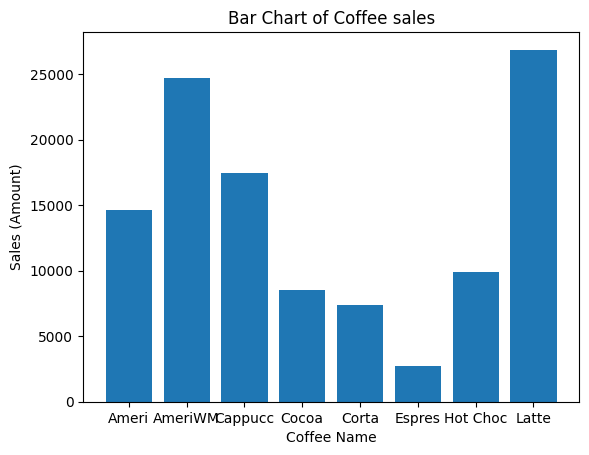

<Figure size 700x800 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [7]:
#Which coffee type generates the most sales revenue?
cts = df.groupby('coffee_name')['money'].sum()
print(cts)

pivot = df.pivot_table(index = ['coffee_name'], values = ['money'], aggfunc = 'sum')
print(pivot)

coffee = np.array(['Ameri', 'AmeriWM', 'Cappucc', 'Cocoa', 'Corta', 'Espres', 'Hot Choc', 'Latte'])
sales = np.array([14650.26, 24751.12, 17439.14, 8521.16, 7384.86, 2690.28, 9933.46, 26875.30])
plt.bar(coffee, sales)
plt.title('Bar Chart of Coffee sales')
plt.xlabel('Coffee Name')
plt.ylabel('Sales (Amount)')
plt.figure(figsize=(7,8))

plt.show()
plt.savefig('coffee_bar.jpg')

**My Analysis**
* Latte coffee generated the most sales revenue over the given period
* Total revenue from Latte coffee = 26875.30
* Americano with milk coffee generated the second highest sales revenue over the given period
* Total revenue from Americano with milk coffee = 24751.12
* Espresso coffee generated the least sales revenue over the given period
* Total revenue from Espresso coffee = 2690.28

### 5.4 Monthly Sales

               money
Month_name          
Apr          5719.56
Aug          7613.84
Dec          8237.74
Feb         13215.48
Jan          6398.86
Jul          6915.94
Jun          7617.76
Mar         15891.64
May          8164.42
Nov          8590.54
Oct         13891.16
Sep          9988.64


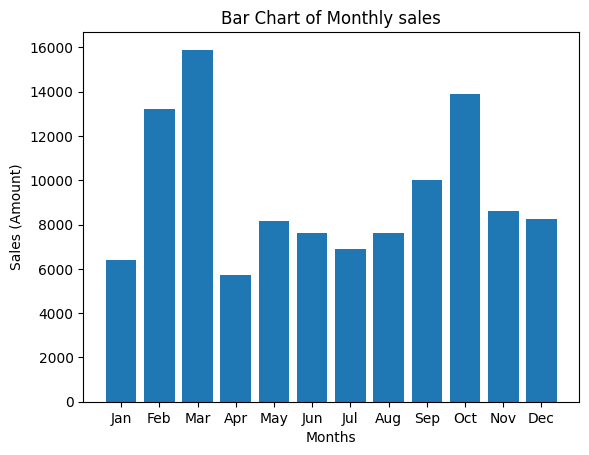

<Figure size 640x480 with 0 Axes>

In [8]:
#Monthly sales
pivot1 = df.pivot_table(index = ['Month_name'], values = ['money'], aggfunc = 'sum')
print(pivot1)

x = np.array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
y = np.array([6398, 13215, 15891, 5719, 8164, 7617, 6915, 7613, 9988, 13891, 8590, 8237])
plt.bar(x, y)
#plt.figure(figsize=(6,4))
plt.title("Bar Chart of Monthly sales")
plt.xlabel("Months")
plt.ylabel("Sales (Amount)")
plt.show()

plt.savefig('month_bar.jpg')

**My Analysis**
* The month of March has the most sales revenue
* Total revenue in the month of March = 15891.64
* The month of October has the second highest sales revenue
* Total revenue in the month of October = 13891.16
* The month of April has the least sales revenue
* Total revenue in the month of April = 5719.56

### 5.5 Sales revenue by days of the week

Weekday
Fri    16802.66
Mon    17363.10
Sat    14733.52
Sun    13336.06
Thu    16091.40
Tue    18168.38
Wed    15750.46
Name: money, dtype: float64


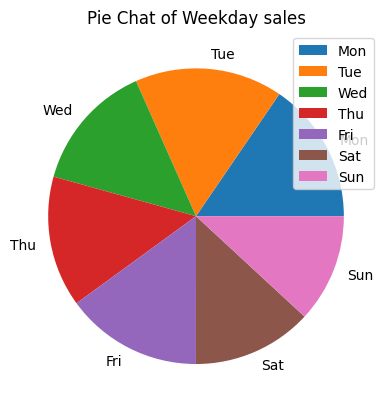

<Figure size 640x480 with 0 Axes>

In [9]:
#Which day of the week has the highest sales?
dfgbd = df.groupby('Weekday')['money'].sum()
print(dfgbd)

x = np.array(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
y = np.array([17363.10, 18168.38, 15750.46, 16091.40, 16802.66, 14733.52, 13336.06])
plt.pie(y, labels = x)
plt.title('Pie Chat of Weekday sales')
plt.legend(loc = 'upper right')

plt.show()
plt.savefig('week_pie.jpg')

**My Analysis**
* The day of the week with the highest sales revenue is Tuesday
* Total sales revenue on Tuesday = 18168.38
* The day of the week with the least sales revenue is Sunday
* Total sales revenue on Sunday = 13336.06

### 5.6 Sales revenue by Time of the Day

Time_of_Day
Afternoon    38130.04
Morning      35929.20
Night        38186.34
Name: money, dtype: float64


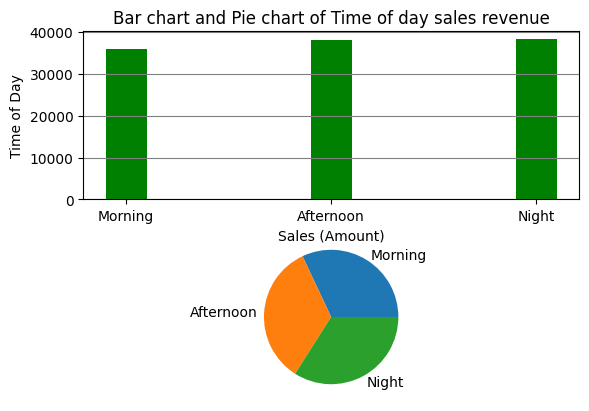

In [10]:
#Sales revenue by Time of Day
dftod = df.groupby('Time_of_Day')['money'].sum()
print(dftod)

tod = np.array(['Morning', 'Afternoon', 'Night'])
amount = np.array([35929.20, 38130.04, 38186.34 ])

#plot 1
plt.subplot(2, 1, 1)
plt.bar(tod, amount, width=0.2, color='green')
plt.title('Bar chart and Pie chart of Time of day sales revenue')
plt.xlabel('Sales (Amount)')
plt.ylabel('Time of Day')
plt.grid(axis='y', color='grey')

#plot 2
plt.subplot(2, 1, 2)
plt.pie(amount, labels = tod)

plt.show()

**My Analysis**
* Night has the most sales revenue (Total) = 38,186.64
* Morning has the least sales revenue (Total) = 35,929.20